<h1>Importing Data</h1>


In [1]:
#import necessary libraries (might not use all but just in case)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scipy
import glob
import matplotlib.colors as mcolors

In [2]:
#importing the main dataset
crash_data = pd.read_csv('crash_data.csv')

In [3]:
# fixing the index
crash_data.set_index('Index', inplace=True)
#crash_data.drop(columns=['Unnamed: 7'], inplace=True)

In [4]:
crash_data

,Disabling Injury(A),Evident Injury(B),Fatal(K),No Injury(O),Possible Injury(C),Unknown
Index,,,,,,
Person (Between 65 and 75) Involved,490,"2,983",240,"33,131","6,690",290
Person (Between 65 and 75) Not Involved,"3,916","20,953","1,458","226,782","42,694","23,575"
Person (>75) Involved,192,"1,442",141,"14,198","2,746",137
Person (>75) Not Involved,"4,214","22,494","1,557","245,715","46,638","23,728"
Teen Involved,468,"3,495",146,"35,894","7,676",274
Teen Not Involved,"3,938","20,441","1,552","224,019","41,708","23,591"
Alcohol Involved,"1,448","4,852",820,"13,526","5,411",433
Alcohol Not Involved,"8,954","55,698","3,438","584,444","130,816","40,681"
Sunday,"1,434","7,876",614,"60,134","14,209","6,476"


<h1>Exploratory Data Analysis</h1>


/var/folders/26/t1nd2f_d7h5ftkrz4132h9p00000gq/T/ipykernel_72773/1135945356.py:41: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


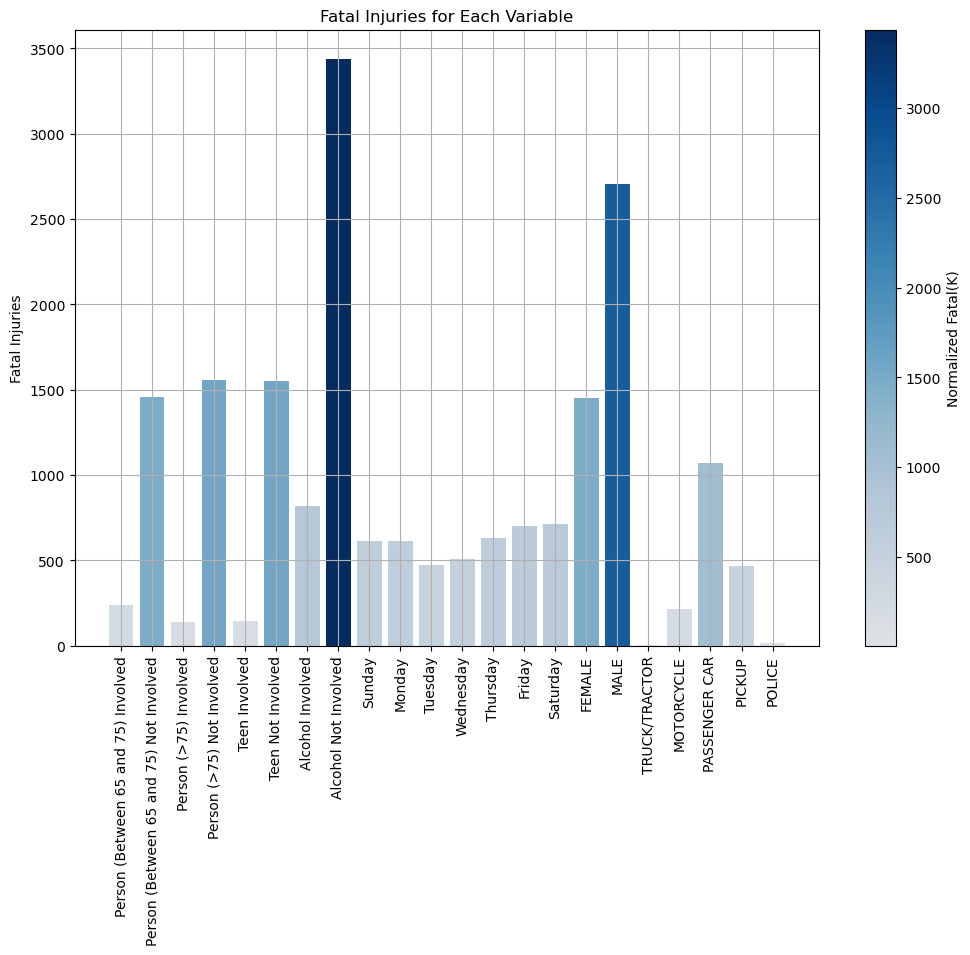

In [6]:
#fatalities per factor

# Convert any commas in the DataFrame to dots and convert to numeric
crash_data = crash_data.replace(',', '', regex=True).astype(int)

# Define a function to modify the brightness of a color
def modify_brightness(color, brightness_factor):
    # Convert RGB color to HSV
    hsv = plt.cm.colors.rgb_to_hsv(color[:3])
    # Modify brightness (V component)
    hsv[2] = hsv[2] * brightness_factor
    # Convert back to RGB
    rgb = plt.cm.colors.hsv_to_rgb(hsv)
    return rgb

# Define original colormap and brightness factor
original_cmap = plt.get_cmap('Blues')
brightness_factor = 0.9  # Adjust this value to modify brightness (0.0 = darker, 1.0 = unchanged)

# Modify the brightness of each color in the original colormap
modified_colors = [modify_brightness(original_cmap(i), brightness_factor) for i in range(original_cmap.N)]

# Create modified colormap
modified_cmap = plt.cm.colors.ListedColormap(modified_colors)

# Normalize the 'Fatal(K)' values to range from 0 to 1
normalize = plt.Normalize(vmin=crash_data['Fatal(K)'].min(), vmax=crash_data['Fatal(K)'].max())

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(crash_data.index, crash_data['Fatal(K)'], color=modified_cmap(normalize(crash_data['Fatal(K)'])))
plt.title('Fatal Injuries for Each Variable')
plt.xlabel('')
plt.ylabel('Fatal Injuries')
plt.xticks(rotation=90)
plt.grid(True)

# Create color bar to show colormap
sm = plt.cm.ScalarMappable(cmap=modified_cmap, norm=normalize)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Normalized Fatal(K)')

plt.show()


In [ ]:
crash_data